# Séries Temporais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()

In [3]:
#!pip install pmdarima

In [4]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## Exploração dos dados

In [12]:
dataset = pd.read_csv('dados\AirPassengers.csv')
print(dataset.shape)
dataset.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('dados\Airpassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

<ipython-input-14-7e2712c7974e>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [15]:
dataset.info()  # month virou a coluna índice

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [17]:
time_series = dataset['#Passengers']
time_series  # temos todas as explorações que o datetime permite

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [19]:
print(time_series.index.max())
print(time_series.index.min())

1960-12-01 00:00:00
1949-01-01 00:00:00


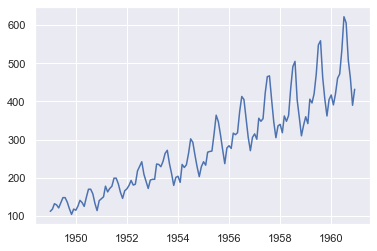

In [20]:
plt.plot(time_series)